In [1]:
import sys, os
sys.path.append('..')
os.chdir('..')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\stirl\AppData\Local\Temp\ipykernel_29232\855688009.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[idx].legend()


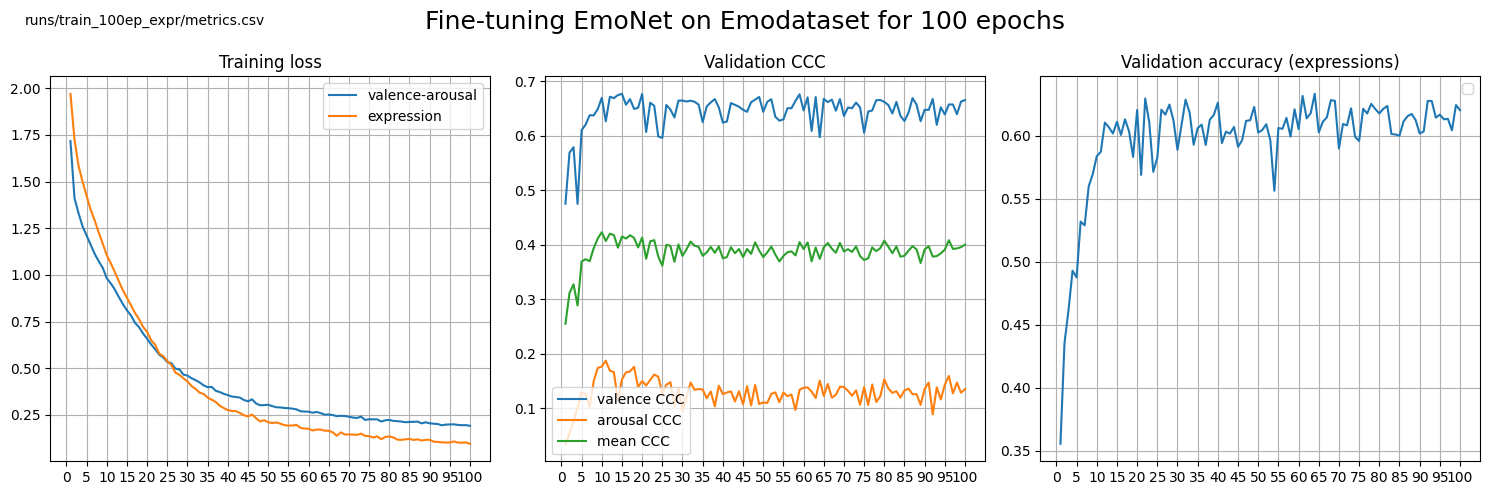

In [13]:
# PLOT
plot_data = [
    {
        'title': 'Training loss',
        'columns': [
            ('train_va', 'valence-arousal'),
            ('train_expr', 'expression'),
        ]
    },
    {
        'title': 'Validation CCC',
        'columns': [
            ('ccc_v', 'valence CCC'),
            ('ccc_a', 'arousal CCC'),
            ('ccc_mean', 'mean CCC'),
        ]
    },
    # {
    #     'title': 'RMSE',
    #     'columns': [
            # ('rmse_v', 'valence'),
            # ('rmse_a', 'arousal'),
    #     ]
    # }
    {
        'title': 'Validation accuracy (expressions)',
        'columns': [
            ('expr_acc', None),
        ]
    }
]

# read csv into dataframe
files = [
    'runs/train_10ep/metrics.csv',
    'runs/train_50ep/metrics.csv',
    'runs/train_5ep_expr/metrics.csv',
    'runs/train_15ep_expr/metrics.csv',
    'runs/train_100ep_expr/metrics.csv',
]
fn = files[-1]
df = pd.read_csv(fn)

# make plot
fig, ax = plt.subplots(ncols=len(plot_data), figsize=(5*len(plot_data), 5))
fig.suptitle(f'Fine-tuning EmoNet on Emodataset for {df["epoch"].max()} epochs', size=18)
fig.text(0.02, 0.95, fn)

for idx, data in enumerate(plot_data):
    ax[idx].set_title(data['title'])
    for column, name in data['columns']:
        ax[idx].plot(df['epoch'], df[column], label=name)
    ax[idx].legend()
    ax[idx].set_xticks(range(0, df['epoch'].max()+1, 5))
    ax[idx].grid()

fig.tight_layout()
run_name = fn.replace('runs/', '').replace('/metrics.csv', '')
plt.savefig(f'data/emodataset/{run_name}.png')
plt.show()

In [38]:
df.head()

,epoch,train_loss,train_va,train_expr,ccc_v,ccc_a,ccc_mean,rmse_v,rmse_a,mae_v,mae_a,expr_acc
0,1,3.687855,1.717429,1.970426,0.475339,0.035171,0.255255,0.823189,0.645988,0.627416,0.524506,0.355646
1,2,3.139335,1.412317,1.727018,0.568806,0.054319,0.311562,0.620606,0.618422,0.459474,0.479095,0.435565
2,3,2.915967,1.331039,1.584928,0.579069,0.076108,0.327589,0.670219,0.513777,0.488166,0.416670,0.461895
3,4,2.760403,1.260390,1.500013,0.475032,0.102319,0.288676,0.771145,0.444908,0.623599,0.356466,0.493047
4,5,2.636003,1.211484,1.424518,0.610022,0.128699,0.369361,0.563287,0.418857,0.403222,0.334927,0.487669
